# Titanic Dataset Exploratory Data Analysis

## The question I am trying to solve: "Can we predict survivors on the titanic on data?"

## 1) Read the dataset, have a look at it, see its characteristics (size, shape, variables, types of the variables, missing values etc). Also have a look at what variable you would find useful later for your prediction and in broad terms what type of prediction would this be.

Import necessary packages

In [94]:
import numpy as np 
import pandas as pd 
from scipy import stats 

import matplotlib.pyplot as plt
import seaborn as sns 


Import the data and look at the first rows

In [95]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [96]:
train.shape

(891, 12)

The dataset has 891 rows and 12 columns. Looking at the columns:

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


The types of data:
- PassengerId - numerical data (int)
- Survived - numerical (int) -> need to be categorical
- Pclass - numerical (int) - > need to be categorical
- Name - NOT SURE (object)
- Sex - categorical, binary (object)
- Age - numerical (float)
- SibSp - numerical (int)
- Parch - numerical (int)
- Ticket - NOT SURE
- Fare - numerical (float)
- Cabin - NOT SURE (object)
- Embarked - categorical, 3 categories (object)

There seems to be 3 of the 12 columns that have null/missing data (Age, Cabin, Embarked).

In [98]:
# which columns contain null/missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [99]:
# train.describe()
# The describe() method is not necessarily useful in this care as the only statistics that make sens here are for Age column, Fare and maybe Survived. It can be seen that the percentage for passengers that survived is 38.38%, the mean age of passengers is approximately 26.7 years and

In [100]:
# make a copy of the data 
df =  train.copy()

### Survived - dependent variable
- is a categorical, binary variable -> classification prediction algorithms!

0    549
1    342
Name: Survived, dtype: int64

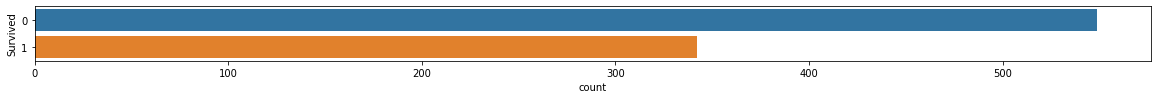

In [101]:
fig = plt.figure(figsize=(20,1))
sns.countplot(data=df, y='Survived')
df["Survived"].value_counts() 

## 2) Choose the features that you think might have an impact on the dependent variable and look at them one by one. Look for:
- what it is describing and the format of the data
- distribution of variable (normal/skewed, outliers, what do missing values look like, weird entries)

For quantitative variables, look at:
- central tendency: mean, median, mode, trimmed mean + visualize them
- spread: range, IQR, variance, SD, MAD + visualize

For categorical variables, look at: 
- frequency + visualize (histogram - box plot)

### Starting with the numerical values. 

I will only keep:

- Pclass - numerical (int)
- Age - numerical (float)
- SibSp - numerical (int)
- Parch - numerical (int)
- Fare - numerical (float)

As PassengerId might not be relevant for the prediction of survival. 

### Feature: Pclass

In [102]:
df["Pclass"].unique() 

array([3, 1, 2], dtype=int64)

Although Pclass is stored as a numerical variable (int), it only contains 3 unique values, therefore it is a categorical variable.

3    491
1    216
2    184
Name: Pclass, dtype: int64

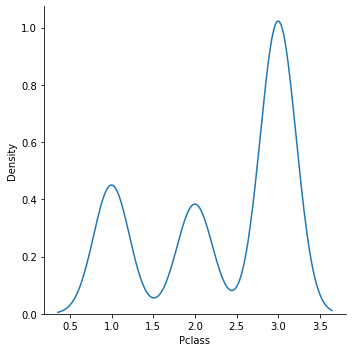

In [125]:
sns.displot(data=df, x='Pclass', kind='kde')
df["Pclass"].value_counts()

### Feature: Age

In [104]:
# median value for age
df["Age"].median()

28.0

In [105]:
# mode - gives an array with the mode value and its counts
stats.mode(df["Age"])

ModeResult(mode=array([24.]), count=array([30]))

In [106]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [119]:
# missing values
df["Age"].isnull().sum()

177

<AxesSubplot:xlabel='Age', ylabel='Count'>

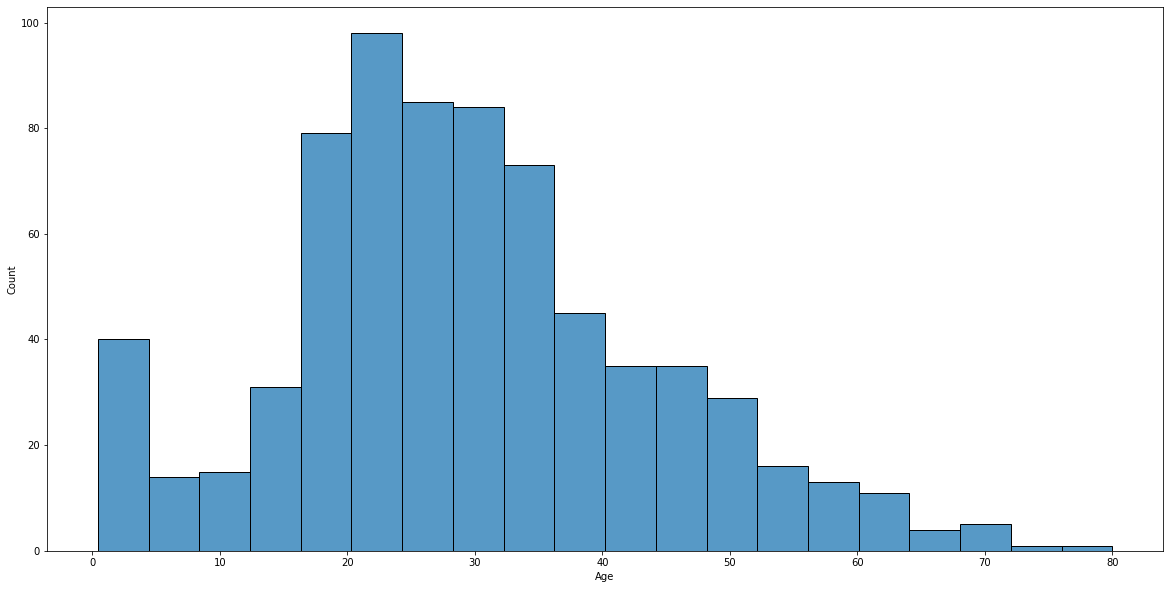

In [122]:
# looking at the distribution of the data
# sns.displot(train, x="Age", kind="kde")
fig = plt.subplots(figsize=(20,10))
sns.histplot(df, x="Age")

This is a distribution of the age in years of 891 passenger on the Titanic from the train dataset. The average and median age are 29 and 28. Given that the data is unimodal with one local maxima and is a bit skewed to the right, the fact that mean is higher than the median is expected. The age ranges from 0.42 years old, the minimum values, to 80 years old, maximum value. There seems to be a high number of people under the age of maybe 5??

### Feature: SibSp

### Feature: Parch

### Feature: Fare

In [116]:
df["Fare"].median()

14.4542

In [117]:
stats.mode(df["Fare"])

ModeResult(mode=array([8.05]), count=array([43]))

In [115]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Count'>

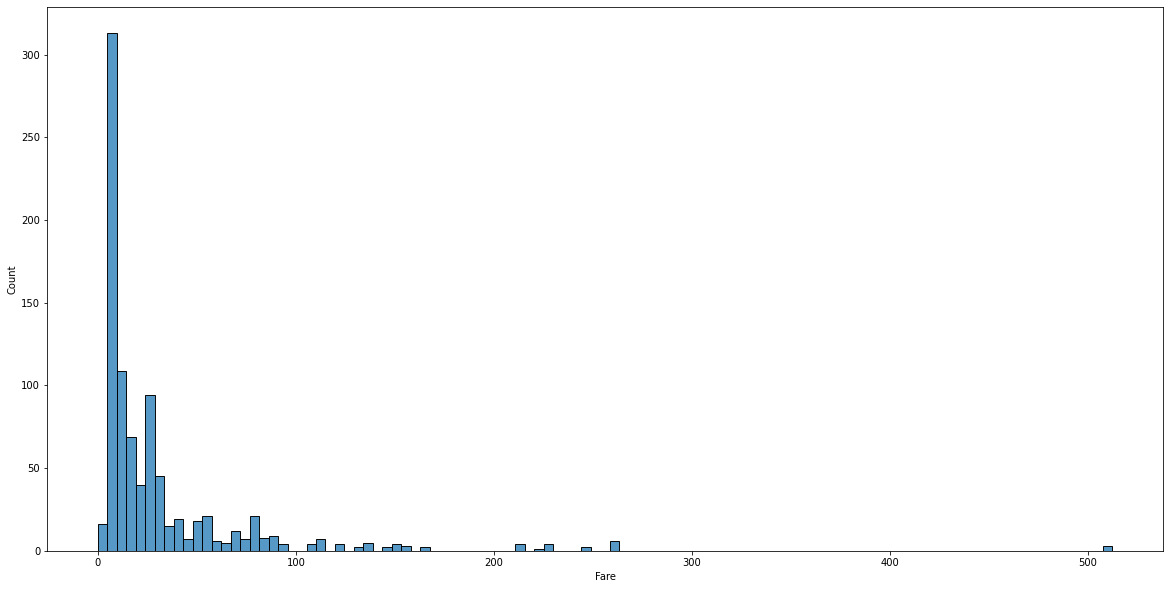

In [121]:
fig = plt.subplots(figsize=(20,10))
sns.histplot(df, x="Fare")

This is a distribution of the fare for 891 passenger on the Titanic from the train dataset. The average and median age are 32.2 and 14.45. Given that the data is unimodal with one local maxima and is very skewed to the right, the fact that mean is higher than the median is expected. The fare ranges from 0, the minimum value, to 512.33, maximum value.

### Categorical values. 

- Sex 
- Embarked

### Feature: Sex

<AxesSubplot:xlabel='Sex', ylabel='Count'>

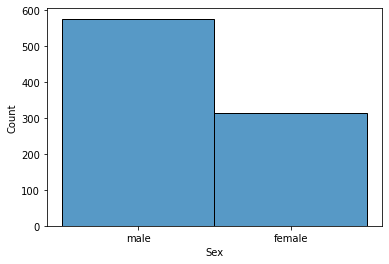

In [132]:
#fig = plt.subplots(figsize=(20,10))
sns.histplot(data=df, x='Sex')

### Feature: Embarked

ConversionError: Failed to convert value(s) to axis units: 0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: x, Length: 891, dtype: object

## 3) Correlation between variables.

<AxesSubplot:xlabel='Sex', ylabel='count'>

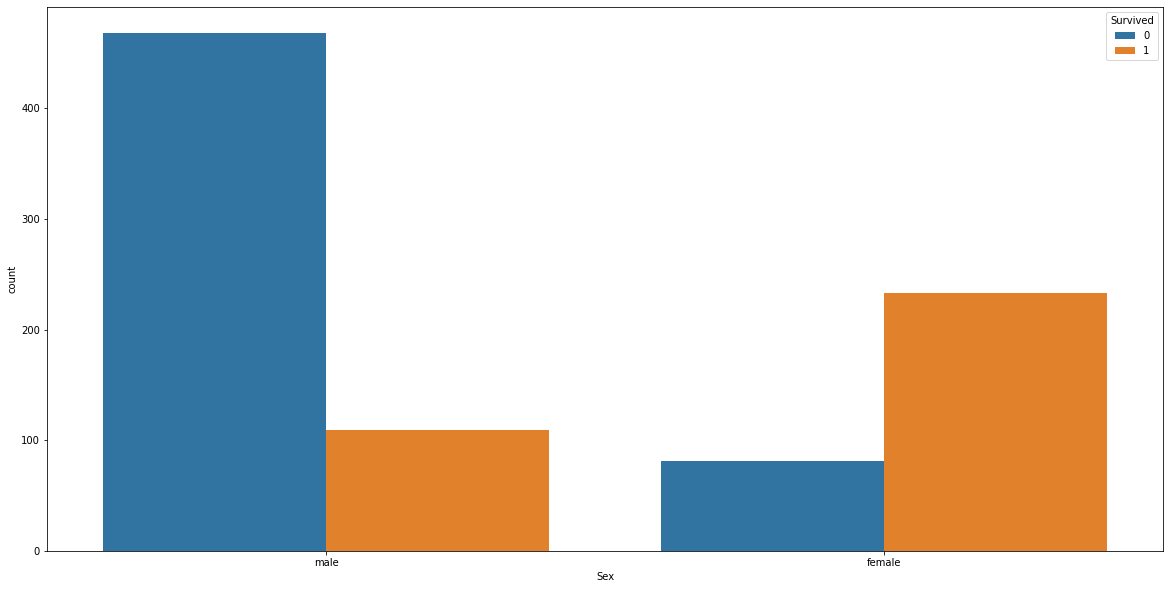

In [126]:
fig = plt.subplots(figsize=(20,10))
sns.countplot(data=df, x="Sex", hue="Survived")

<AxesSubplot:xlabel='Sex', ylabel='count'>

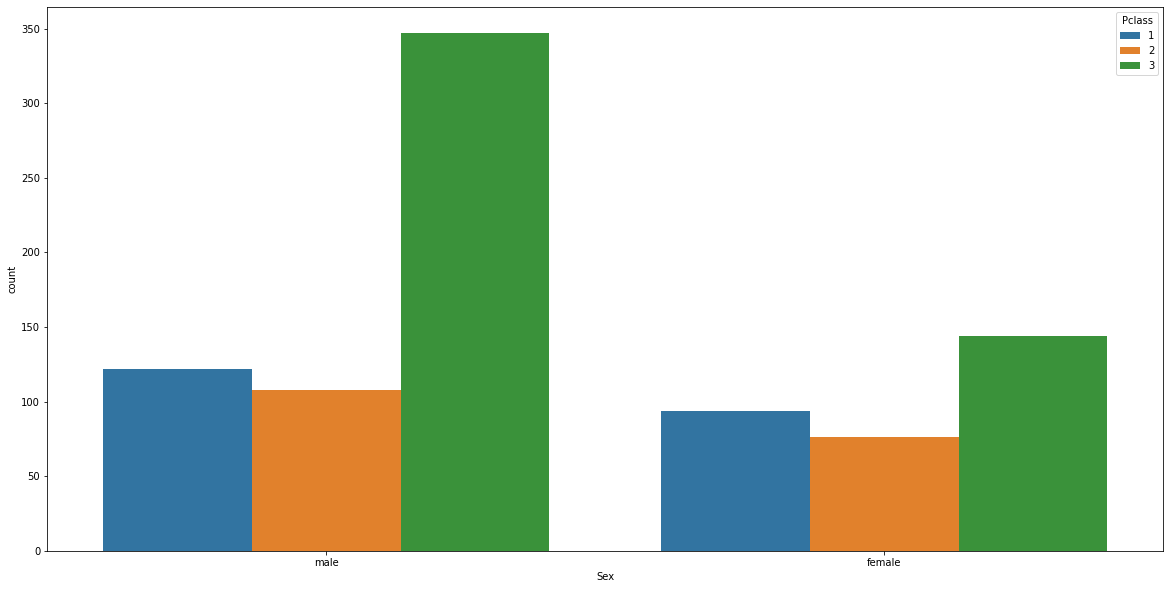

In [127]:
fig = plt.subplots(figsize=(20,10))
sns.countplot(data=df, x="Sex", hue="Pclass")

### 4) Feature engineering. Name is not necessarily an useful feature of this dataset, but the title it contains for each passenger might be a good predictor. Make a new column in the dataset that contains this new feature.

In [110]:
# data["Title"] = data.["Name"].apply(lambda x: x.split())